In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [38]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lib.stats.stats as st
import config.config as conf


In [3]:
path = f'./result/'
file_list = os.listdir(path)

In [4]:
def make_one_file(ver):
    path = f'./result/{ver}'
    file_list = os.listdir(path)
    df = pd.DataFrame()
    if len(file_list)>0 : 
        for f in file_list:
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            df = pd.concat([df, tmp], axis =0)

        df.sort_values(by = ['creationdate']).reset_index(drop=True)
        return df
    else :
        return np.NAN

In [5]:
def pp_date(df):
    df = df.sort_values(by = ['creationdate'])
    df_date = df[['creationdate']].drop_duplicates().reset_index(drop=True)
    return df_date
        

In [6]:
def pp_df(df, sc_num):
    df_copy = df.copy()
    df_copy['creationdate'] = pd.to_datetime(df_copy['creationdate'])
    df_copy.loc[:, 'rel_day'] = df_copy.loc[:,  'creationdate'] - datetime.datetime(2022,11,30)
    df_copy.loc[:, 'rel_days'] = df_copy.loc[:, 'rel_day'].dt.days

    df_c = df.copy()
    df_c = df_c[~df_c['result'].isna()]
    df_c['o_result'] = df_c['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
    df_c = df_c[df_c['o_result'].isin(['1', '0', '2'])]
    
    df_c.loc[:, 'cnt'] = 1
    chk_cnt = df_c.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'cnt']]
    chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]


    m_chk_cnt = pd.merge(chk_cnt, df_copy, on = 'id')
        
    return m_chk_cnt
        



In [7]:
def calc_rate(df):
    df_c = df.copy()
    df_c = df_c[['ver', 'creationdate', 'id', 'o_result', 'rel_days']].drop_duplicates()
    df_c.loc[:, 'r_cnt'] = 1
    
    df_c = df_c.groupby(['ver', 'creationdate', 'rel_days', 'o_result']).count().reset_index()[['ver', 'creationdate', 'rel_days'	,'o_result',	'r_cnt']]
    tot_df = df_c.groupby(['ver', 'creationdate', 'rel_days']).sum().reset_index()[['creationdate', 'r_cnt']].rename(columns = {'r_cnt':'tot_cnt'})

    return_df = pd.merge(df_c, tot_df, on = 'creationdate' )

    return_df['rate'] = return_df['r_cnt']/return_df['tot_cnt']*100
    return_df = return_df.sort_values(by = ['creationdate'])

    return return_df
        



In [8]:
sample_list = sorted([y for y in [x for x in file_list if x.isdigit()] if (int(y)>=50000)&(int(y)<11110000)])

In [9]:
sample_list

['100000',
 '100001',
 '100002',
 '100003',
 '100004',
 '100005',
 '100006',
 '100007',
 '100008',
 '100009',
 '100010',
 '100011',
 '100012',
 '100013',
 '100014',
 '100015',
 '100016',
 '100017',
 '100018',
 '100019',
 '100020',
 '100021',
 '100022',
 '100023',
 '100025',
 '100026',
 '100027',
 '100028',
 '100029',
 '100030',
 '100031',
 '100032',
 '100033',
 '100034',
 '100035',
 '100036',
 '100037',
 '100038',
 '100039',
 '100040',
 '100041',
 '100042',
 '100043',
 '100044',
 '100045',
 '100046',
 '100047',
 '100048',
 '100050',
 '100051',
 '100052',
 '100053',
 '100054',
 '100055',
 '100056',
 '100057',
 '100058',
 '100059',
 '100060',
 '100061',
 '100062',
 '100063',
 '100064',
 '100065',
 '100066',
 '100067',
 '100068',
 '100069',
 '100070',
 '100071',
 '100072',
 '100073',
 '100075',
 '100076',
 '100077',
 '100078',
 '100079',
 '100080',
 '100081',
 '100082',
 '100083',
 '100084',
 '100085',
 '100086',
 '100087',
 '100088',
 '100089',
 '100090',
 '100091',
 '100092',
 '100093',

In [10]:
tot_calc = pd.DataFrame()
for listid in sample_list:
    df = make_one_file(listid)
    if isinstance(df, pd.core.frame.DataFrame):
        df = pp_df(df, 5)
        df = calc_rate(df)
        tot_calc = pd.concat([tot_calc, df], axis = 0)

    

In [11]:
tot_calc

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,100000,2021-12-10,-355,0,3,22,13.636364
1,100000,2021-12-10,-355,1,17,22,77.272727
2,100000,2021-12-10,-355,2,2,22,9.090909
0,100001,2022-01-10,-324,0,6,25,24.000000
1,100001,2022-01-10,-324,1,15,25,60.000000
...,...,...,...,...,...,...,...
1,50247,2023-10-05,309,1,14,24,58.333333
2,50247,2023-10-05,309,2,5,24,20.833333
0,50248,2023-11-05,340,0,5,20,25.000000
1,50248,2023-11-05,340,1,8,20,40.000000


In [12]:
df_date = pp_date(tot_calc)

In [13]:
df_date.head()

,creationdate
0,2021-12-05
1,2021-12-10
2,2021-12-15
3,2021-12-20
4,2021-12-25


In [14]:
tot_calc.head()

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,100000,2021-12-10,-355,0,3,22,13.636364
1,100000,2021-12-10,-355,1,17,22,77.272727
2,100000,2021-12-10,-355,2,2,22,9.090909
0,100001,2022-01-10,-324,0,6,25,24.000000
1,100001,2022-01-10,-324,1,15,25,60.000000


In [15]:
tot_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2609 entries, 0 to 2
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           2609 non-null   int64         
 1   creationdate  2609 non-null   datetime64[ns]
 2   rel_days      2609 non-null   int64         
 3   o_result      2609 non-null   object        
 4   r_cnt         2609 non-null   int64         
 5   tot_cnt       2609 non-null   int64         
 6   rate          2609 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 163.1+ KB


In [16]:
tot_calc[tot_calc['creationdate'] =='2022-05-15']

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,150005,2022-05-15,-199,0,8,22,36.363636
1,150005,2022-05-15,-199,1,14,22,63.636364


In [17]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [18]:
m_chk_cnt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           881 non-null    int64         
 1   creationdate  881 non-null    datetime64[ns]
 2   rel_days      881 non-null    int64         
 3   o_result      881 non-null    object        
 4   r_cnt         881 non-null    int64         
 5   tot_cnt       881 non-null    int64         
 6   rate          881 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 55.1+ KB


In [19]:
m_chk_cnt_0 = pd.merge(df_date, m_chk_cnt_0[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_1 = pd.merge(df_date, m_chk_cnt_1[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_2 = pd.merge(df_date, m_chk_cnt_2[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')

In [20]:
m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'] = 0
m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'] = 0
m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'] = 0

In [21]:
m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)

0     -360 days
1     -360 days
2     -360 days
3     -360 days
4     -360 days
         ...   
832    360 days
833    360 days
834    360 days
835    360 days
836    360 days
Name: creationdate, Length: 837, dtype: timedelta64[ns]

In [22]:
m_chk_cnt_0['rel_days'] = np.where(m_chk_cnt_0['rel_days'].isna(), (m_chk_cnt_0['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_0['rel_days'])
m_chk_cnt_1['rel_days'] = np.where(m_chk_cnt_1['rel_days'].isna(), (m_chk_cnt_1['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_1['rel_days'])    
m_chk_cnt_2['rel_days'] = np.where(m_chk_cnt_2['rel_days'].isna(), (m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_2['rel_days'])



In [23]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [24]:
m_chk_cnt_0.head()
# m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,creationdate,rel_days,o_result,rate
0,2021-12-05,-360,0,19.047619
1,2021-12-05,-360,0,21.739130
2,2021-12-05,-360,0,41.176471
3,2021-12-05,-360,0,50.000000
4,2021-12-05,-360,0,25.000000


In [25]:
# major_xticks = df_date['creationdate'].apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

In [26]:
major_xticks = df_date['creationdate'].to_list()
# .apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

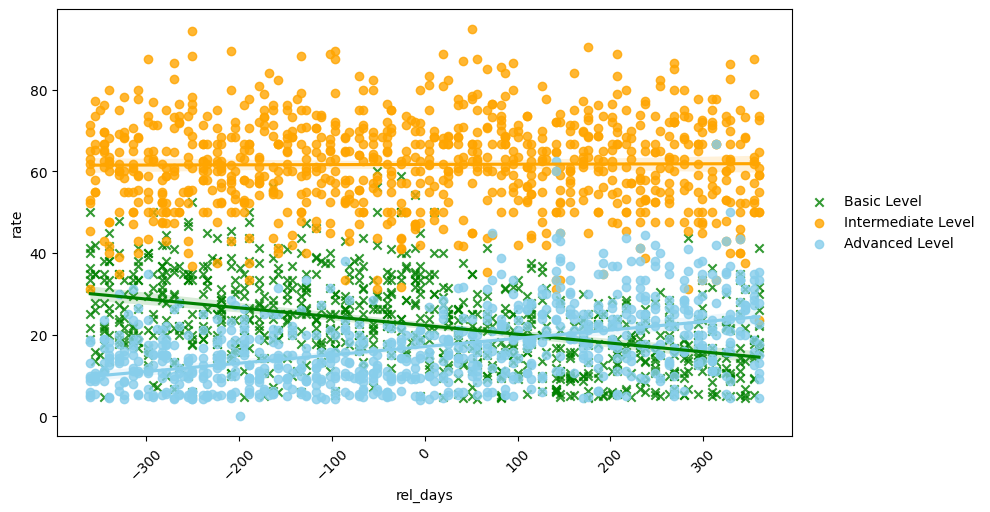

In [27]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)




#create scatterplot with regression line
sns.regplot(  data=m_chk_cnt_0
            , x="rel_days"
            , y="rate"
            , ci=99
            , marker="x"
            , color=".5"
            , scatter_kws={"color": "green"}
            , line_kws={"color": "green"}
            , label = 'Basic Level')

sns.regplot(  data=m_chk_cnt_1
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "orange"}
            , line_kws={"color": "orange"}
            , label = 'Intermediate Level')

sns.regplot(  data=m_chk_cnt_2
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "skyblue"}
            , line_kws={"color": "skyblue"}
            , label = 'Advanced Level')

# ax.scatter(m_chk_cnt_0.creationdate, m_chk_cnt_0.rate, # specify data
#         color = 'red',
#         label = 'Basic',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

# ax.scatter(m_chk_cnt_1.creationdate, m_chk_cnt_1.rate, # specify data
#         color = 'orange',
#         label = 'Intermediate',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 


# ax.scatter(m_chk_cnt_2.creationdate, m_chk_cnt_2.rate, # specify data
#         color = 'green',
#         label = 'Advanced',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

ax.legend(loc="center left", bbox_to_anchor=[1, 0.5], frameon=False)

# ax.axvline(major_xticks[25], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)


# ax.set_xticks(major_xticks)

plt.tight_layout()  
plt.xticks(rotation=45)
# plt.xscale('log');
plt.show();

In [28]:
m_chk_cnt_0[m_chk_cnt_0['rel_days'] ==1]

,creationdate,rel_days,o_result,rate


In [29]:
m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,creationdate,rel_days,o_result,rate


In [30]:
st_0 = st.Stats(m_chk_cnt_0['rel_days'].values, m_chk_cnt_0['rate'].values, 2, 0.95)
st_1 = st.Stats(m_chk_cnt_1['rel_days'].values, m_chk_cnt_1['rate'].values, 2, 0.95)
st_2 = st.Stats(m_chk_cnt_2['rel_days'].values, m_chk_cnt_2['rate'].values, 2, 0.95)

In [31]:
F_stat_0, p_value_0 = st_0.chow_test()
F_stat_1, p_value_1 = st_1.chow_test()
F_stat_2, p_value_2 = st_2.chow_test()

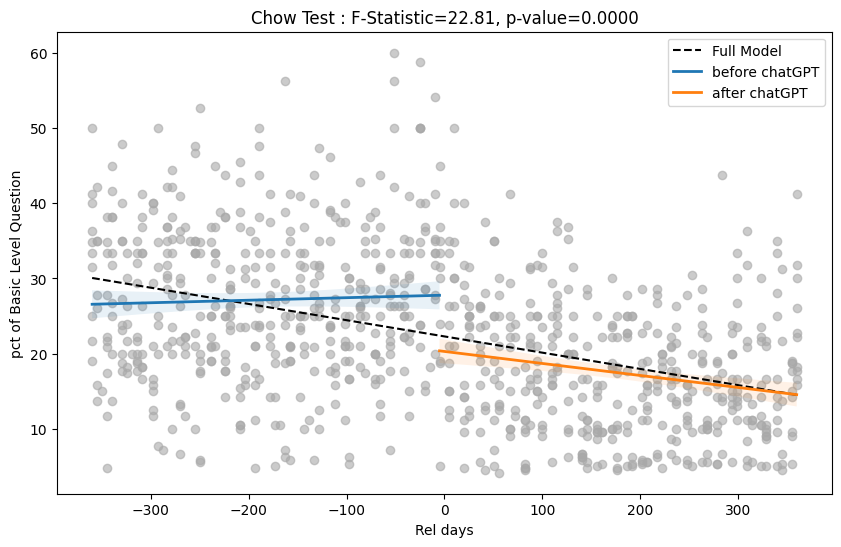

In [32]:
x_0 = m_chk_cnt_0['rel_days'].values
y_0 = m_chk_cnt_0['rate'].values

split_idx = np.argmax(np.where(x_0 <= 0))
x_0_1= x_0[:split_idx]
x_0_2= x_0[split_idx:]
# 시각화

plt.figure(figsize=(10, 6))
plt.scatter(x_0, y_0,  alpha=0.6, color='darkgray')
plt.plot(x_0, st_0.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_0_1, st_0.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)

plt.plot(x_0_2, st_0.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_0:.2f}, p-value={p_value_0:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Basic Level Question")
plt.show()


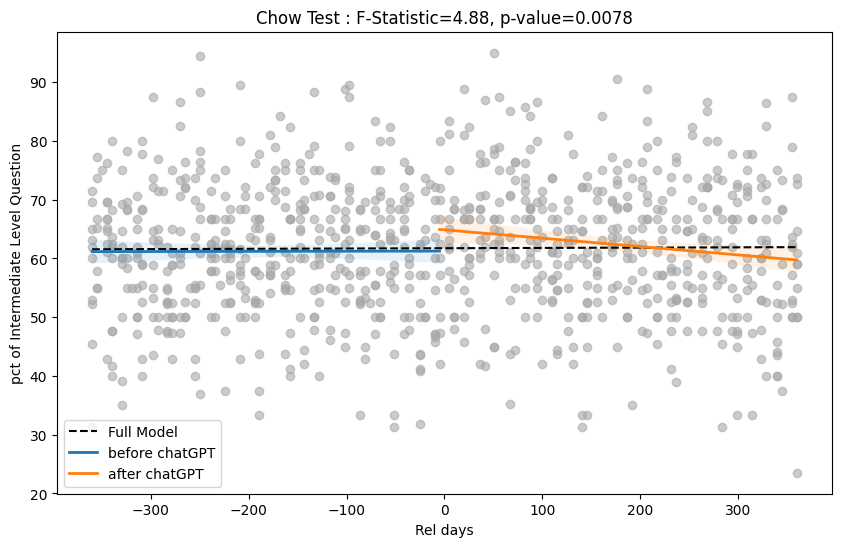

In [33]:
x_1 = m_chk_cnt_1['rel_days'].values
y_1 = m_chk_cnt_1['rate'].values

split_idx = np.argmax(np.where(x_1 <= 0))
x_1_1 = x_1[:split_idx]
x_1_2 = x_1[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_1, y_1,  alpha=0.6, color='darkgray')
plt.plot(x_1, st_1.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_1_1, st_1.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)

plt.plot(x_1_2, st_1.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_1:.2f}, p-value={p_value_1:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Intermediate Level Question")
plt.show()


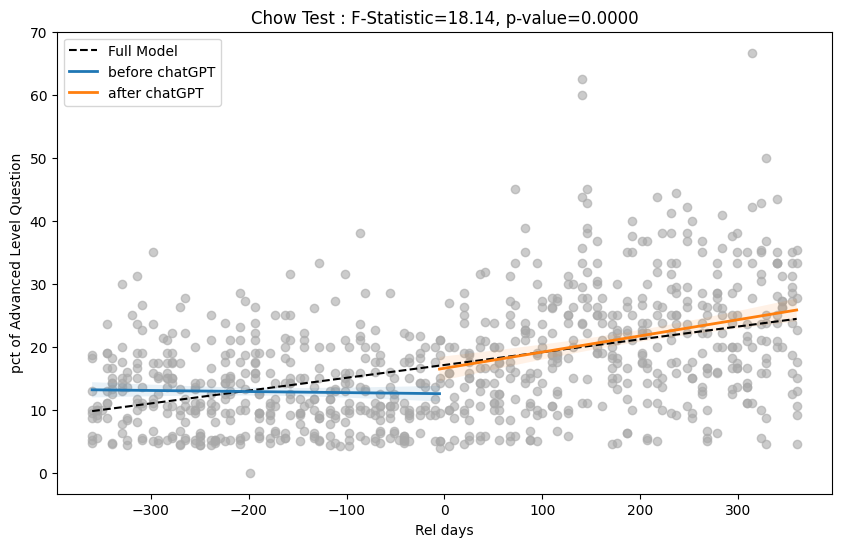

In [34]:
x_2 = m_chk_cnt_2['rel_days'].values
y_2 = m_chk_cnt_2['rate'].values

split_idx = np.argmax(np.where(x_2 <= 0))
x_2_1 = x_2[:split_idx]
x_2_2 = x_2[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_2, y_2,  alpha=0.6, color='darkgray')
plt.plot(x_2, st_2.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_2_1, st_2.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)

plt.plot(x_2_2, st_2.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_2:.2f}, p-value={p_value_2:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Advanced Level Question")
plt.show()


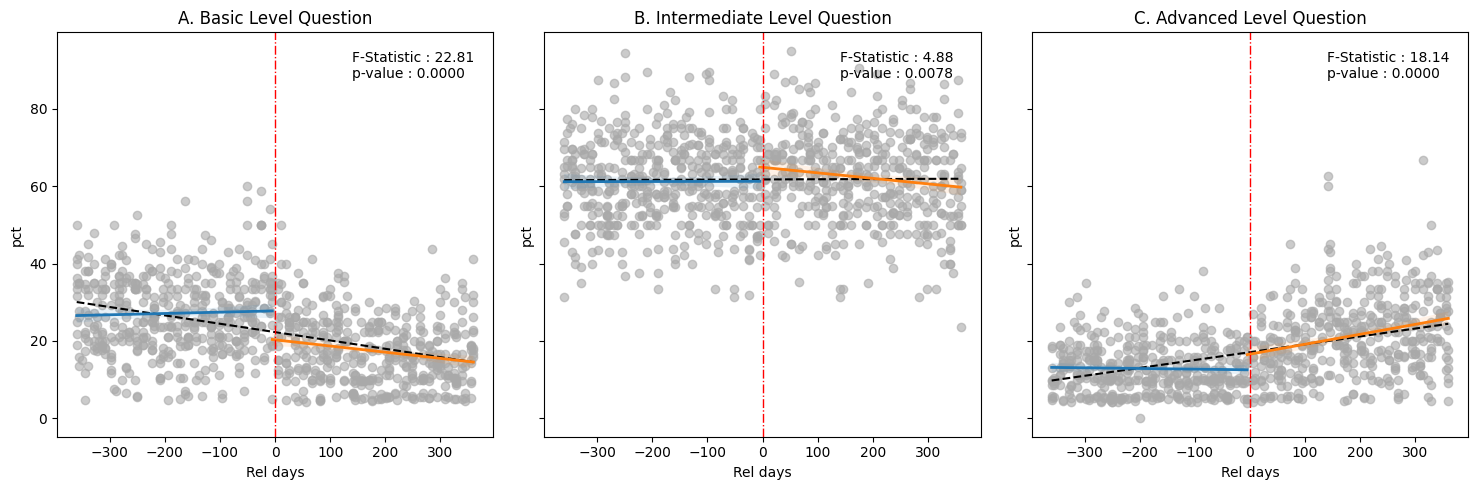

In [35]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (15, 5), sharey=sharey, sharex=sharex)


axs[0].scatter(x_0, y_0,  alpha=0.6, color='darkgray')
axs[0].plot(x_0, st_0.y_predict, label="Full Model", linestyle="--", color="black")  
axs[0].plot(x_0_1, st_0.y1_predict, label="before chatGPT", linewidth='2')
axs[0].fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)
axs[0].plot(x_0_2, st_0.y2_predict, label="after chatGPT", linewidth='2')
axs[0].fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].set_title(f"A. Basic Level Question")
axs[0].set_xlabel("Rel days")
axs[0].set_ylabel("pct")
axs[0].text(140, 88, s=f'F-Statistic : {F_stat_0:.2f}\np-value : {p_value_0:.4f}', fontsize = 10) #


axs[1].scatter(x_1, y_1,  alpha=0.6, color='darkgray')
axs[1].plot(x_1, st_1.y_predict, label="Full Model", linestyle="--", color="black")  
axs[1].plot(x_1_1, st_1.y1_predict, label="before chatGPT", linewidth='2')
axs[1].fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)
axs[1].plot(x_1_2, st_1.y2_predict, label="after chatGPT", linewidth='2')
axs[1].fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].set_title(f"B. Intermediate Level Question")
axs[1].set_xlabel("Rel days")
axs[1].set_ylabel("pct")
axs[1].grid(False)
axs[1].text(140, 88, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 10) #


axs[2].scatter(x_2, y_2,  alpha=0.6, color='darkgray')
axs[2].plot(x_2, st_2.y_predict, label="Full Model", linestyle="--", color="black")  
axs[2].plot(x_2_1, st_2.y1_predict, label="before chatGPT", linewidth='2')
axs[2].fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)
axs[2].plot(x_2_2, st_2.y2_predict, label="after chatGPT", linewidth='2')
axs[2].fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)
axs[2].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[2].set_title(f"C. Advanced Level Question")
axs[2].set_xlabel("Rel days")
axs[2].set_ylabel("pct")
axs[2].text(140, 88, s=f'F-Statistic : {F_stat_2:.2f}\np-value : {p_value_2:.4f}', fontsize = 10) #

fig.tight_layout()
plt.show();

In [39]:
with open(f'{conf.DATA_PATH}/data/m_chk_cnt_0.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_0, f)


with open(f'{conf.DATA_PATH}/data/m_chk_cnt_1.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_1, f)


with open(f'{conf.DATA_PATH}/data/m_chk_cnt_2.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_2, f)